# **Text Network**

In [8]:
import pandas as pd
import numpy as np 
import csv
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
texts_file = "sms.csv"
genders_file = "genders.csv"

# **Nodes**

In [10]:
gender_df = pd.read_csv(genders_file)
gender_df.head()

,# user,female
0,0,0
1,2,0
2,3,0
3,4,0
4,5,0


In [11]:
gender_df = gender_df.rename(columns={'# user' : 'user'})

In [12]:
gender_df['female'].value_counts()

0    614
1    173
Name: female, dtype: int64

([<matplotlib.patches.Wedge at 0x1a331f51ca0>,
 [Text(-0.7006926077430178, -0.8479562898253008, 'male'),
  Text(0.7643919357196559, 0.9250432252639644, 'female')],
 [Text(-0.38219596785982785, -0.4625216126319822, '78.0%'),
  Text(0.4458952958364659, 0.5396085480706458, '22.0%')])

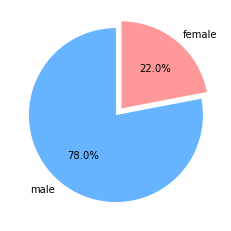

In [13]:
plt.pie(x=gender_df['female'].value_counts() ,
               explode=(0, 0.1), labels = ['male','female'],
               colors=['#66b3ff','#ff9999'],autopct='%1.1f%%',startangle=90)

# Edges

In [20]:
texts_df = pd.read_csv(texts_file)
texts_df

,timestamp,sender,recipient
0,18,370,512
1,37,512,370
2,126,370,512
3,134,0,512
4,312,137,136
...,...,...,...
24328,2415198,238,26
24329,2416413,137,136
24330,2417238,136,137
24331,2417633,323,392


**Cleaning the data**


In [21]:
nodes = gender_df['user'].to_list() # list of all nodes
text_edges = [tuple(e) for e in zip(texts_df['sender'].to_list(), texts_df['recipient'].to_list())] # list of all edges

# **The average interactions between:**
 - Females to Females
 - Females to Males

In [22]:
female_counter = 0 
male_counter = 0
counter = 0
for i,row in texts_df.iterrows():
    sender =row['sender']
    recipient = row['recipient']
    #print(caller)
    
    if sender in gender_df['user'].to_list() and recipient in gender_df['user'].to_list():
         if  gender_df.loc[gender_df['user']==sender,'female'].item() == 0:
                counter += 1
                if  gender_df.loc[gender_df['user']==recipient,'female'].item() == 0:
                    female_counter += 1
                if gender_df.loc[gender_df['user']==recipient,'female'].item() == 1:
                    male_counter += 1
print("Number of texts sent by a female is " + str(counter))   
print("Number of texts received by a female is " + str(female_counter)) 
print("Number of texts received by a male is " + str(male_counter)) 

Number of texts sent by a female is 13514
Number of texts received by a female is 7287
Number of texts received by a male is 6227


Plotting the percentages of calls made by a female to a male and to a female

([<matplotlib.patches.Wedge at 0x1a332176c70>,
 [Text(-1.0916613339358763, 0.13518702596530227, 'male'),
  Text(1.1909032871923575, -0.14747664409809966, 'female')],
 [Text(-0.5954516366922961, 0.07373837779925578, '46.1%'),
  Text(0.6946935841955417, -0.08602804239055814, '53.9%')])

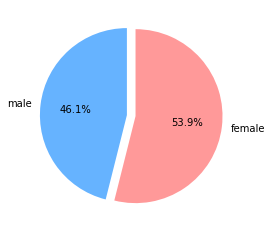

In [23]:
y = np.array([male_counter,female_counter])

plt.pie(x= y,
               explode=(0, 0.1), labels = ['male','female'],
               colors=['#66b3ff','#ff9999'],autopct='%1.1f%%',startangle=90)

# The average interaction between:
 - Males to Males
 - Males to females

In [29]:
female_counter = 0 
male_counter = 0
counter = 0
for i,row in texts_df.iterrows():
    sender =row['sender']
    recipient = row['recipient']
    #print(caller)
    
    if sender in gender_df['user'].to_list() and recipient in gender_df['user'].to_list():
         if gender_df.loc[gender_df['user']==sender,'female'].item()== 1:
                counter += 1
                if gender_df.loc[gender_df['user']==recipient,'female'].item()== 0:
                    female_counter += 1
                if gender_df.loc[gender_df['user']==recipient,'female'].item() == 1:
                    male_counter += 1
print("Number of texts sent by a male is " + str(counter))   
print("Number of texts received by a female is " + str(female_counter)) 
print("Number of texts received by a male is " + str(male_counter)) 

Number of texts sent by a male is 9555
Number of texts received by a female is 6766
Number of texts received by a male is 2789


([<matplotlib.patches.Wedge at 0x1a3322935e0>,
 [Text(-0.8731563405703522, 0.6690276563205674, 'male'),
  Text(0.9525341897131113, -0.72984835234971, 'female')],
 [Text(-0.47626709485655566, 0.3649241761748549, '29.2%'),
  Text(0.5556449439993149, -0.4257448722039975, '70.8%')])

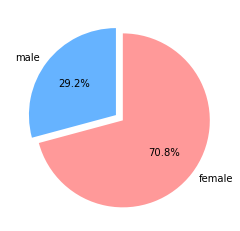

In [30]:
y = np.array([male_counter,female_counter])

plt.pie(x= y,
               explode=(0, 0.1), labels = ['male','female'],
               colors=['#66b3ff','#ff9999'],autopct='%1.1f%%',startangle=90)

# Clustring Coefficient

In [38]:
def df_sub_period(period,df):
    for i,row in df.iterrows():
        if row['timestamp']>period:
            df = df.drop(i)
    return df

In [39]:
def create_graph(df):
    nodes = gender_df['user'].to_list() # list of all nodes
    edges = [tuple(e) for e in zip(df['sender'].to_list(), df['recipient'].to_list())] # list of all edges
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [40]:
def weekly_graph(week,df):
    period = week * 3600 * 24
    sub_df = df_sub_period(period, df)
    G = create_graph(sub_df)
    return G
    

In [41]:
females = []
males = []
for i,row in gender_df.iterrows():
    if row['female'] == 1:
        females.append(row['user'])
    else:
        males.append(row['user'])

In [77]:
def clustring_plt(clustring_coe,gender):   
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    weeks = ['one week', 'two weeks', 'three weeks', 'four weeks']

    ax.bar(weeks,clustring_coe)
    ax.set_title("Average Clustering Coefficient of "+gender+ " Students in Texts Network")
    ax.set_ylabel('average value')
    ax.set_xlabel('weeks')
#     for index, value in enumerate(clustring_coe):
#         plt.text(value, index, str(value))
    plt.show()

In [78]:
def results(nodes):    
    G = weekly_graph(7, texts_df)

    first_week = nx.average_clustering(G,nodes)

    G = weekly_graph(14, texts_df)

    second_week = nx.average_clustering(G,nodes)

    G = weekly_graph(21, texts_df)

    third_week = nx.average_clustering(G,nodes)

    G = weekly_graph(28, texts_df)

    fourth_week = nx.average_clustering(G,nodes)
    
    clustring_coe = [first_week,second_week,third_week,fourth_week]
    return clustring_coe

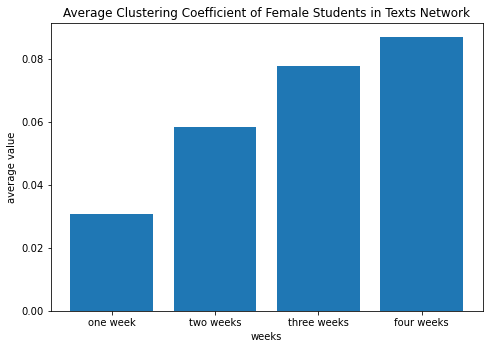

In [79]:
clustring_plt(results(females),"Female")

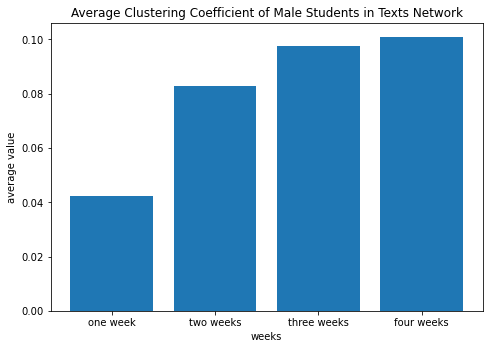

In [80]:
clustring_plt(results(males),"Male")

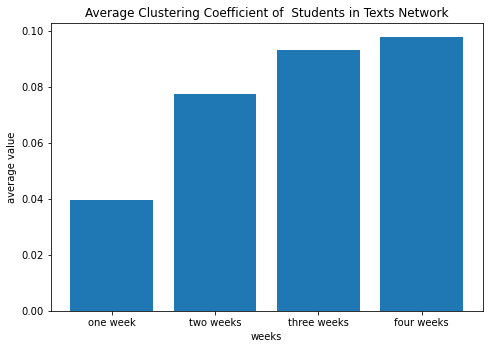

In [81]:
clustring_plt(results(gender_df['user']),"")

In [68]:
G = create_graph(texts_df)

In [69]:
all_cliques= nx.enumerate_all_cliques(G)
triad_cliques=[x for x in all_cliques if len(x)==3 ]

In [72]:

def tri(triad_cliques):
    female_homo =0
    male_homo = 0
    male_hetro =0
    female_hetro=0
    for tri in triad_cliques:
        female_count = 0
        male_count = 0
        for node in tri:
            if node in gender_df['user'].to_list():
                if gender_df.loc[gender_df['user'] == node,'female'].item() == 0:
                    male_count += 1
                else:
                    female_count += 1
        if male_count == 0:
            female_homo += 1
        elif female_count == 0:
            male_homo +=1
        elif female_count > male_count and male_count!=0:
            female_hetro += 1
        elif male_count> female_count and female_count!=0:
            male_hetro += 1
#         print(tri)
#         print("females: "+str(female_count))
#         print("males: "+str(male_count))
    print("female homophilly: "+str(female_homo))
    print("male homophilly: "+str(male_homo))
    print("male hetrophilly: "+str(male_hetro))
    print("female hetrophilly: "+str(female_hetro))
    return female_homo, female_hetro, male_homo, male_hetro

In [73]:
tri(triad_cliques)

female homophilly: 7
male homophilly: 53
male hetrophilly: 28
female hetrophilly: 5


(7, 5, 53, 28)

to get more accurate result we get that with the average of female students and average of male students

In [75]:
def tri_plt(tri):   
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    group = ['Females only', '2 Females, 1 Male', 'Males only', '2 Males, 1 Female']
    ax.bar(group,tri)
    ax.set_title("Gender in Triangles formed in Texts Network")
    ax.set_ylabel('count')
    ax.set_xlabel('group')
#     for index, value in enumerate(clustring_coe):
#         plt.text(value, index, str(value))
    plt.show()

female homophilly: 7
male homophilly: 53
male hetrophilly: 28
female hetrophilly: 5


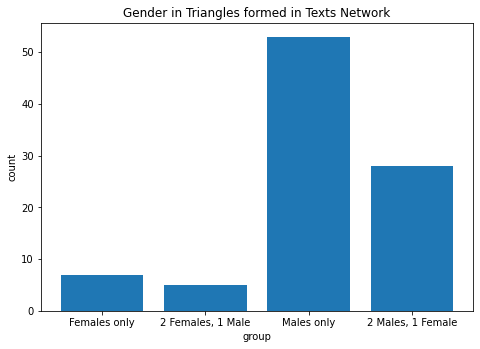

In [76]:
tri_plt(tri(triad_cliques))